In [90]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from LinearRegression import LinearRegression
from NeuralNetwork import NeuralNetwork

In [48]:
class min_max_scaler():
    def __init__ (self, data, y = None):
        self.data = data
        self.y = y
        self.min_params = {}
        self.max_params = {}
        self.single = {}
        for i in data.columns:
            if (i != self.y) :
                if (len(data[i].unique())>1):
                    self.min_params[i] = min(data[i])
                    self.max_params[i] = max(data[i])
                else:
                    self.single[i] = 0.001
    
    def transform(self, data):
        copy = data.copy()
        for i in data.columns:
            if ((i != self.y) and (i not in self.single.keys())):
                copy[i] = data[i].apply(lambda x : (x- self.min_params[i]) / (self.max_params[i] - self.min_params[i]))
            elif (i in self.single.keys()):
                copy[i] = self.single[i]
            else:
                copy[i] = data[i]
        return copy

# Reading Data

In [9]:
red = pd.read_csv("../data/winequality-red.csv", sep = ";")
white = pd.read_csv("../data/winequality-white.csv", sep = ";")

In [10]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [12]:
wine = pd.concat([red, white], ignore_index = True)

In [13]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Checking for missing values

In [14]:
wine[wine.isna().any(axis=1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


## Saving Data

In [15]:
wine.to_csv("../data/wine.csv", index = False)

## Loading Data

In [16]:
wine = pd.read_csv("../data/wine.csv")

## Data Summary

In [17]:
def dataDescription(data):
    # for column in data.columns:
    #     print(column)
    #     print(data[column].describe()) 
    #     print('\n')
    display(np.round(data.describe()))

In [18]:
dataDescription(wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0
mean,7.0,0.0,0.0,5.0,0.0,31.0,116.0,1.0,3.0,1.0,10.0,6.0
std,1.0,0.0,0.0,5.0,0.0,18.0,57.0,0.0,0.0,0.0,1.0,1.0
min,4.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,3.0,0.0,8.0,3.0
25%,6.0,0.0,0.0,2.0,0.0,17.0,77.0,1.0,3.0,0.0,10.0,5.0
50%,7.0,0.0,0.0,3.0,0.0,29.0,118.0,1.0,3.0,1.0,10.0,6.0
75%,8.0,0.0,0.0,8.0,0.0,41.0,156.0,1.0,3.0,1.0,11.0,6.0
max,16.0,2.0,2.0,66.0,1.0,289.0,440.0,1.0,4.0,2.0,15.0,9.0


## Visualization

In [19]:
def visualize(data):
    plt.figure(figsize = (10, 10))
    ax = sns.heatmap(data.corr(), annot = True, fmt='.1g', vmin = -1, vmax = 1, center = 0)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()

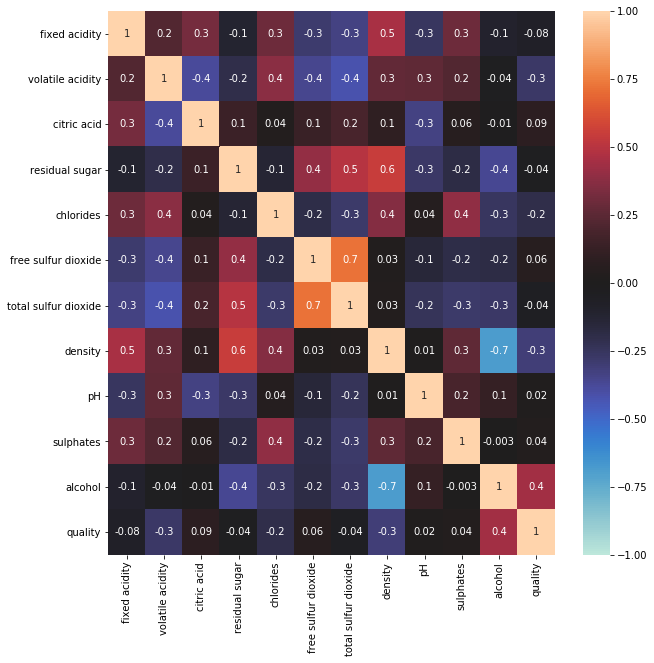

In [20]:
visualize(wine)

## Predicting Missing Values
#### As you can see that our data do not contain any missing values. So, we are going to simulate missing value scenairo but randomly removing some data values.

In [21]:
data = wine.values.tolist()
train = data[:5000]
test = data[5000:]

In [22]:
def estimate_error_mean_mode(new_df, num_var, folds = 5, missing_ratio= 0.1):
    num_error = {}
    for i in num_var:
        #Removing missing data
        data = new_df[i].dropna().reset_index(drop = True)
        #Scaling the data
        minimum = min(data)
        maximum = max(data)
        transformed = (data - minimum) / (maximum - minimum)
        org = transformed.copy()
        error_temp = []
        #Doings folds to get average error
        for j in range(folds):
            sample_index = random.sample(list(data.index), math.floor(missing_ratio * len(data)))
            transformed[sample_index] = np.nan
            transformed = transformed.fillna(transformed.mean())
            error_temp.append(np.sum((org - transformed)**2)/len(sample_index))
        num_error[i] = sum(error_temp)/folds


    print("Numeric attributes imputation error : ", sum(num_error.values()))
    return num_error

In [23]:
errors = estimate_error_mean_mode(wine , num_var = wine.columns, folds = 5, missing_ratio= 0.1)

Numeric attributes imputation error :  0.36472701270986857


In [71]:
def visualizeError(errors, figsize = (20,5)):
    x = []
    y = []

    for k, v in errors.items():
        x.append(k)
        y.append(v)
    plt.figure(figsize = figsize)
    sns.barplot(x=x, y=y)
    plt.show()

In [97]:
errors

{'fixed acidity': 0.02978921574752271,
 'volatile acidity': 0.03088822350791895,
 'citric acid': 0.01984250659540131,
 'residual sugar': 0.01519736641383269,
 'chlorides': 0.010550135156451349,
 'free sulfur dioxide': 0.009752587446107994,
 'total sulfur dioxide': 0.04350581616512642,
 'density': 0.00934774085609133,
 'pH': 0.0419221066665504,
 'sulphates': 0.018170147653683324,
 'alcohol': 0.07920523444240546,
 'quality': 0.056555932058776584}

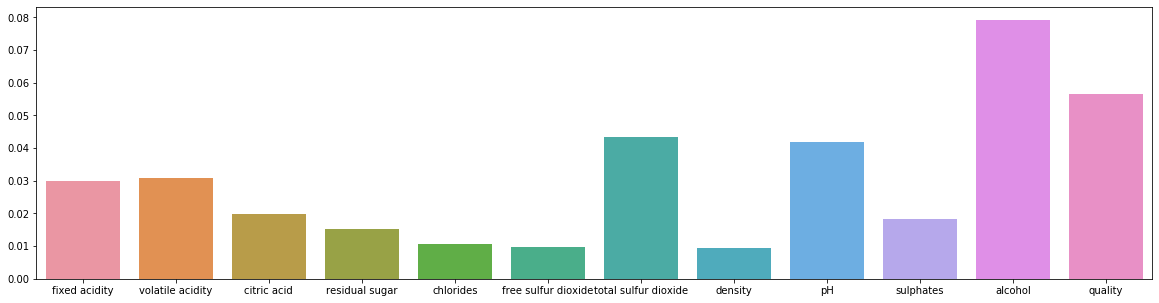

In [72]:
visualizeError(errors)

In [26]:
def get_filled_columns(data):
    curr_missing = data.isna().sum()
    non_missing = curr_missing[curr_missing == 0]
    return list(non_missing.index)

In [62]:
def get_least_missing_column(data):
    curr_missing = data.isna().sum()
    missing = curr_missing[curr_missing != 0]
    return (missing.sort_values().index[0]) if not missing.empty else None

In [37]:
def kFold(input_data, k = 10):
    temp = list(range(input_data.shape[0]))
    random.shuffle(temp)
    per_fold = math.floor(len(temp)/folds)
    folds_data= {}
    for i in range(folds):
        data = input_data
        start = i * per_fold
        end = (i + 1) * per_fold
        if i == folds - 1:
            folds_data[i] = {}
            folds_data[i]['Val_data'] = data.iloc[temp[start:]]
            folds_data[i]['Train_data'] = data.drop(temp[start:], axis = 0)
        else:
            folds_data[i] = {}
            folds_data[i]['Val_data'] = data.iloc[temp[start:end]]
            folds_data[i]['Train_data'] = data.drop(temp[start:end], axis = 0)
            val_data = data.iloc[temp[start:end]]
    return folds_data

In [40]:
wine_copy = wine.copy()

In [56]:
def generate_missing_data(data, n_col):
    total_cols = data.shape[1]
    total_samples = data.shape[0]
    if n_col == 0:
        print("Need to give a value more than 0 for generating missing data")
        return
    r_cols = random.sample(range(total_cols), n_col)
    n_samples = random.sample(range(total_samples), random.randint(5, 60))
    for i in r_cols:
        n_samples = random.sample(range(total_samples),int(random.randint(5, 60) * 100 / total_samples))
        data.iloc[:, i].where(data.iloc[n_samples, i] < 0, inplace=True)

    return data

In [57]:
wine_copy = generate_missing_data(wine_copy, 12)

In [58]:
wine_copy.isna

<bound method DataFrame.isna of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70          NaN             NaN        NaN   
1               NaN              0.88         0.00             NaN        NaN   
2               7.8              0.76          NaN             NaN      0.092   
3              11.2              0.28          NaN             1.9        NaN   
4               7.4              0.70          NaN             NaN      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21          NaN             NaN      0.039   
6493            6.6              0.32         0.36             8.0        NaN   
6494            6.5              0.24          NaN             1.2        NaN   
6495            5.5              0.29          NaN             NaN        NaN   
6496            6.0              0.21          NaN             NaN        NaN

In [129]:
# Initiation and parameters
num_error = {}
data = wine_copy.copy()
hold_out_ratio = 0.1
folds = 5
param1 = ['Ridge']
param2 = [0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 5]
param3 = [30,50,100,150,200,500,1000]
param4 = [0.001, 0.01, 0.05, 0.1,0.5]

while(True):
    y = get_least_missing_column(data)
    if not y:
        break
    new_data = data[get_filled_columns(data) + [y]].copy()
    # Ends here
    model_data = new_data[new_data[y].notnull()].copy()
    sample_index = random.sample(list(model_data.index), math.floor(hold_out_ratio * len(model_data)))
    # Hold out data has the data based on teh hold out ratio
    hold_out_data = model_data.loc[sample_index].reset_index(drop = True)
    train_data = model_data.drop(sample_index, axis = 0).reset_index(drop = True)
    folds_data = kFold(train_data, k = folds)
    print("num", y)
    best = -1
    for j in param1:
        for k in param2:
            error = []
            for i in range(folds):
                training_data = folds_data[i]['Train_data']
                validation_data = folds_data[i]['Val_data']
                scaler = min_max_scaler(training_data)
                training_data = scaler.transform(training_data)
                validation_data = scaler.transform(validation_data)
                ######## Insert the Model here and make changes accordingly
                LR_Model = LinearRegression(method= j, lambda_value= k)
                LR_Model.fit(training_data, y)
                error.append(LR_Model.error(validation_data))
            if np.mean(error) < best or best == -1:
                best = np.mean(error)
                hold_out_data = scaler.transform(hold_out_data)
                num_error[y] = LR_Model.error(hold_out_data)
                best_model = LR_Model
    print("Error : ", num_error[y])
    for index, row in new_data[new_data[y].isna()].drop(y,axis = 1).iterrows():
        #print(index)
        row['Bias'] = 1.0
        data.at[index ,y] = best_model.predict_row(row)

num alcohol
Error :  0.037420712007990006
num density
Error :  0.0029537599483100883
num fixed acidity
Error :  0.4416284705115753
num volatile acidity
Error :  0.01945748327420451
num pH
Error :  84.50651069237102
num total sulfur dioxide
Error :  0.180745050431498
num sulphates
Error :  0.2002680670894873
num quality
Error :  0.8917828752996507
num residual sugar
Error :  0.015094436610787392
num chlorides
Error :  0.010131369831922718
num citric acid
Error :  0.020709289414679748
num free sulfur dioxide
Error :  0.05747589378050314


In [130]:
num_error

{'alcohol': 0.037420712007990006,
 'density': 0.0029537599483100883,
 'fixed acidity': 0.4416284705115753,
 'volatile acidity': 0.01945748327420451,
 'pH': 84.50651069237102,
 'total sulfur dioxide': 0.180745050431498,
 'sulphates': 0.2002680670894873,
 'quality': 0.8917828752996507,
 'residual sugar': 0.015094436610787392,
 'chlorides': 0.010131369831922718,
 'citric acid': 0.020709289414679748,
 'free sulfur dioxide': 0.05747589378050314}

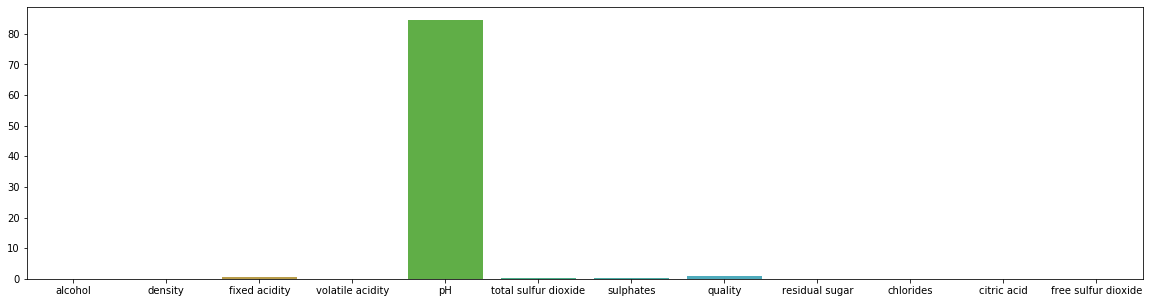

In [131]:
visualizeError(num_error, (20,5))

In [132]:
del num_error["pH"]
del num_error["chlorides"]

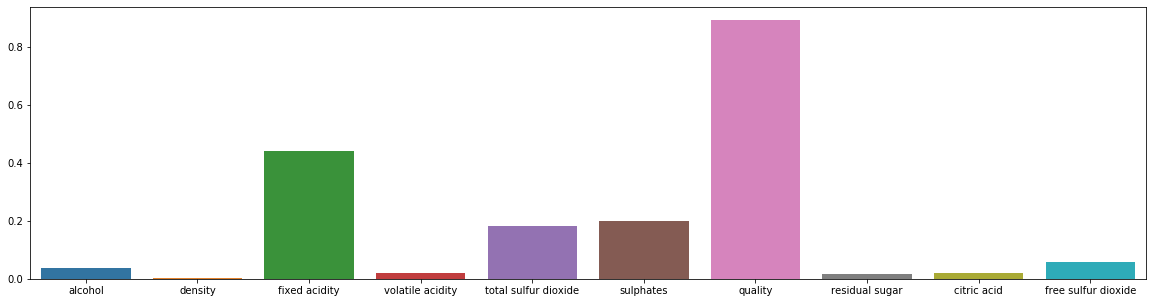

In [133]:
visualizeError(num_error)

In [101]:
num_error = {}
data = wine_copy.copy()
hold_out_ratio = 0.1
folds = 5
param1 = [[5,5], [3,3]]
param2 = [0.003, 0.05, 0.1]
param3 = [[5,5], [3,3]]
param4 = [0.003, 0.05, 0.1]

while(True):
    y = get_least_missing_column(data)
    if not y:
        break
#     y = 'sysjust8'
    new_data = data[get_filled_columns(data) + [y]].copy()

    # Ends here
    model_data = new_data[new_data[y].notnull()].copy()
    sample_index = random.sample(list(model_data.index), math.floor(hold_out_ratio * len(model_data)))
    # Hold out data has the data based on teh hold out ratio
    hold_out_data = model_data.loc[sample_index].reset_index(drop = True)
    train_data = model_data.drop(sample_index, axis = 0).reset_index(drop = True)
    folds_data = kFold(train_data, k = folds)
    print("num", y)
    best = -1
    for j in param1:
        for k in param2:
            error = []
            for i in range(folds):
                training_data = folds_data[i]['Train_data']
                validation_data = folds_data[i]['Val_data']
                scaler = min_max_scaler(training_data)
                training_data = scaler.transform(training_data)
                validation_data = scaler.transform(validation_data)
                ######## Insert the Model here and make changes accordingly
                NN_Model = NeuralNetwork(X = training_data.drop(y, axis = 1).values, y = np.array(training_data[y]) , 
                                            layers = j, learning_rate = k)
                NN_Model.fit(X = training_data.drop(y, axis = 1).values, y = np.array(training_data[y]))
                error.append(NN_Model.error(validation_data.drop(y,axis = 1).values, y = np.array(validation_data[y])))
            if np.mean(error) < best or best == -1:
                best = np.mean(error)
                hold_out_data = scaler.transform(hold_out_data)
                num_error[y] = NN_Model.error(hold_out_data.drop(y,axis = 1).values,np.array(hold_out_data[y]) )
                best_model = NN_Model
    print("Error : ", num_error[y])
    for index, row in new_data[new_data[y].isna()].drop(y,axis = 1).iterrows():
        data.at[index ,y] = best_model.predict_row(row)

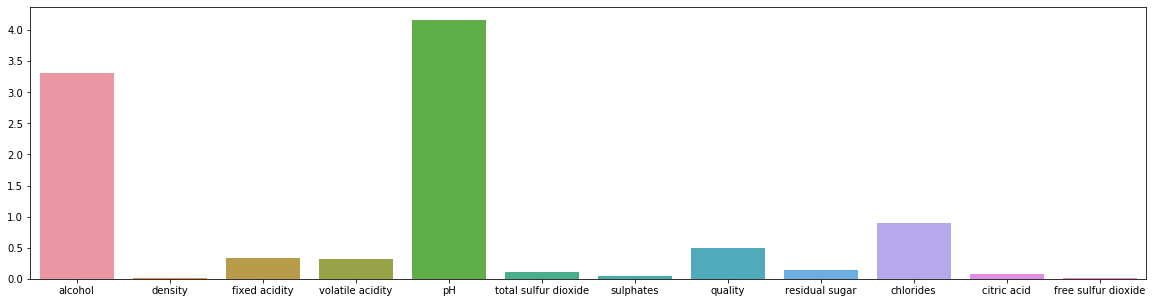

In [92]:
visualizeError(num_error)

In [134]:
allColumns = wine.columns

In [135]:
allColumns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [142]:
dataFrame = pd.DataFrame()

for col in allColumns:
    dataFrame[col] = np.nan
dataFrame["alcohol"] = np.random.normal(10, 1, 1000)
dataFrame = pd.concat([wine, dataFrame], ignore_index = True)

In [143]:
dataFrame

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.400000,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.800000,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.800000,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.800000,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.400000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.007821,NaN
7493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.569795,NaN
7494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.778629,NaN
7495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.653361,NaN


In [144]:
num_error = {}
data = dataFrame.copy()
hold_out_ratio = 0.1
folds = 5
param1 = ['Ridge']
param2 = [0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 5]
param3 = [30,50,100,150,200,500,1000]
param4 = [0.001, 0.01, 0.05, 0.1,0.5]

while(True):
    y = get_least_missing_column(data)
    if not y:
        break
    new_data = data[get_filled_columns(data) + [y]].copy()
    # Ends here
    model_data = new_data[new_data[y].notnull()].copy()
    sample_index = random.sample(list(model_data.index), math.floor(hold_out_ratio * len(model_data)))
    # Hold out data has the data based on teh hold out ratio
    hold_out_data = model_data.loc[sample_index].reset_index(drop = True)
    train_data = model_data.drop(sample_index, axis = 0).reset_index(drop = True)
    folds_data = kFold(train_data, k = folds)
    print("num", y)
    best = -1
    for j in param1:
        for k in param2:
            error = []
            for i in range(folds):
                training_data = folds_data[i]['Train_data']
                validation_data = folds_data[i]['Val_data']
                scaler = min_max_scaler(training_data)
                training_data = scaler.transform(training_data)
                validation_data = scaler.transform(validation_data)
                ######## Insert the Model here and make changes accordingly
                LR_Model = LinearRegression(method= j, lambda_value= k)
                LR_Model.fit(training_data, y)
                error.append(LR_Model.error(validation_data))
            if np.mean(error) < best or best == -1:
                best = np.mean(error)
                hold_out_data = scaler.transform(hold_out_data)
                num_error[y] = LR_Model.error(hold_out_data)
                best_model = LR_Model
    print("Error : ", num_error[y])
    for index, row in new_data[new_data[y].isna()].drop(y,axis = 1).iterrows():
        #print(index)
        row['Bias'] = 1.0
        data.at[index ,y] = best_model.predict_row(row)

num fixed acidity
Error :  0.5776685619439711
num volatile acidity
Error :  0.03547150671789506
num citric acid
Error :  0.005175455859371025
num residual sugar
Error :  0.8103133821960521
num chlorides
Error :  0.0015404492748397444
num free sulfur dioxide
Error :  0.0023449539161147113
num total sulfur dioxide
Error :  0.006051152215680339
num density
Error :  0.0004611613156203749
num pH
Error :  0.006223436100464398
num sulphates
Error :  0.004251572159065156
num quality
Error :  0.01458606097248823


In [145]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5.000000
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5.000000
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5.000000
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6.000000
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
7492,-0.300786,-0.002760,0.140948,-2.318870,-0.528090,-0.680283,-2.070841,-2.266555,1.639146,0.074132,9.007821,3.458171
7493,-0.337065,-0.013716,0.137229,-2.481197,-0.566443,-0.732777,-2.225429,-2.425494,1.722526,0.069701,9.569795,3.651097
7494,-0.350547,-0.017787,0.135847,-2.541519,-0.580695,-0.752285,-2.282875,-2.484558,1.753510,0.068055,9.778629,3.722791
7495,-0.407017,-0.034840,0.130059,-2.794187,-0.640393,-0.833994,-2.523498,-2.731953,1.883294,0.061158,10.653361,4.023088
